# UNSUPERVISED LEARNING ASSIGNMENT

# 1. DATA PRE-PROCESSING

In [1]:
#IMPORTING LIBRARIES
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#READING DATA AND DROPPING NULL VALUES
df = pd.read_csv('vehicle.csv').dropna()

In [3]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
#SHAPE OF DATA
df.shape

(813, 19)

#### THERE ARE 813 ROWS AND 19 ATTRIBUTES IN DATA AFTER DELETING THE NULL VALUES

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

#### ALL THE ATTRIBUTES OF THE DATA ARE NUMERICAL EXCEPT CLASS WHICH IS OBJECT. IT HAS TO BE CHANGED TO CATERGORICAL

In [6]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

#### THERE ARE NO NULL VALUES

In [7]:
#ANALYSING THE TARGET VARIABLE
pd.value_counts(df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

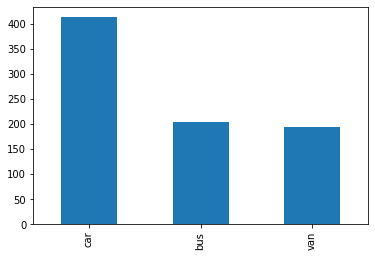

In [8]:
pd.value_counts(df["class"]).plot(kind="bar")

In [9]:
replaceStruct = { "class": {"car":0, "bus":1, "van":2},}
df=df.replace(replaceStruct)

In [10]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      0  
3             199.0            207      2  
4             180.0            183      1

#### TARGET VARIABLE CLASS CHANGED TO CATERGORICAL VARIABLE.

# 2. UNDERSTANDING THE ATTRIBUTES

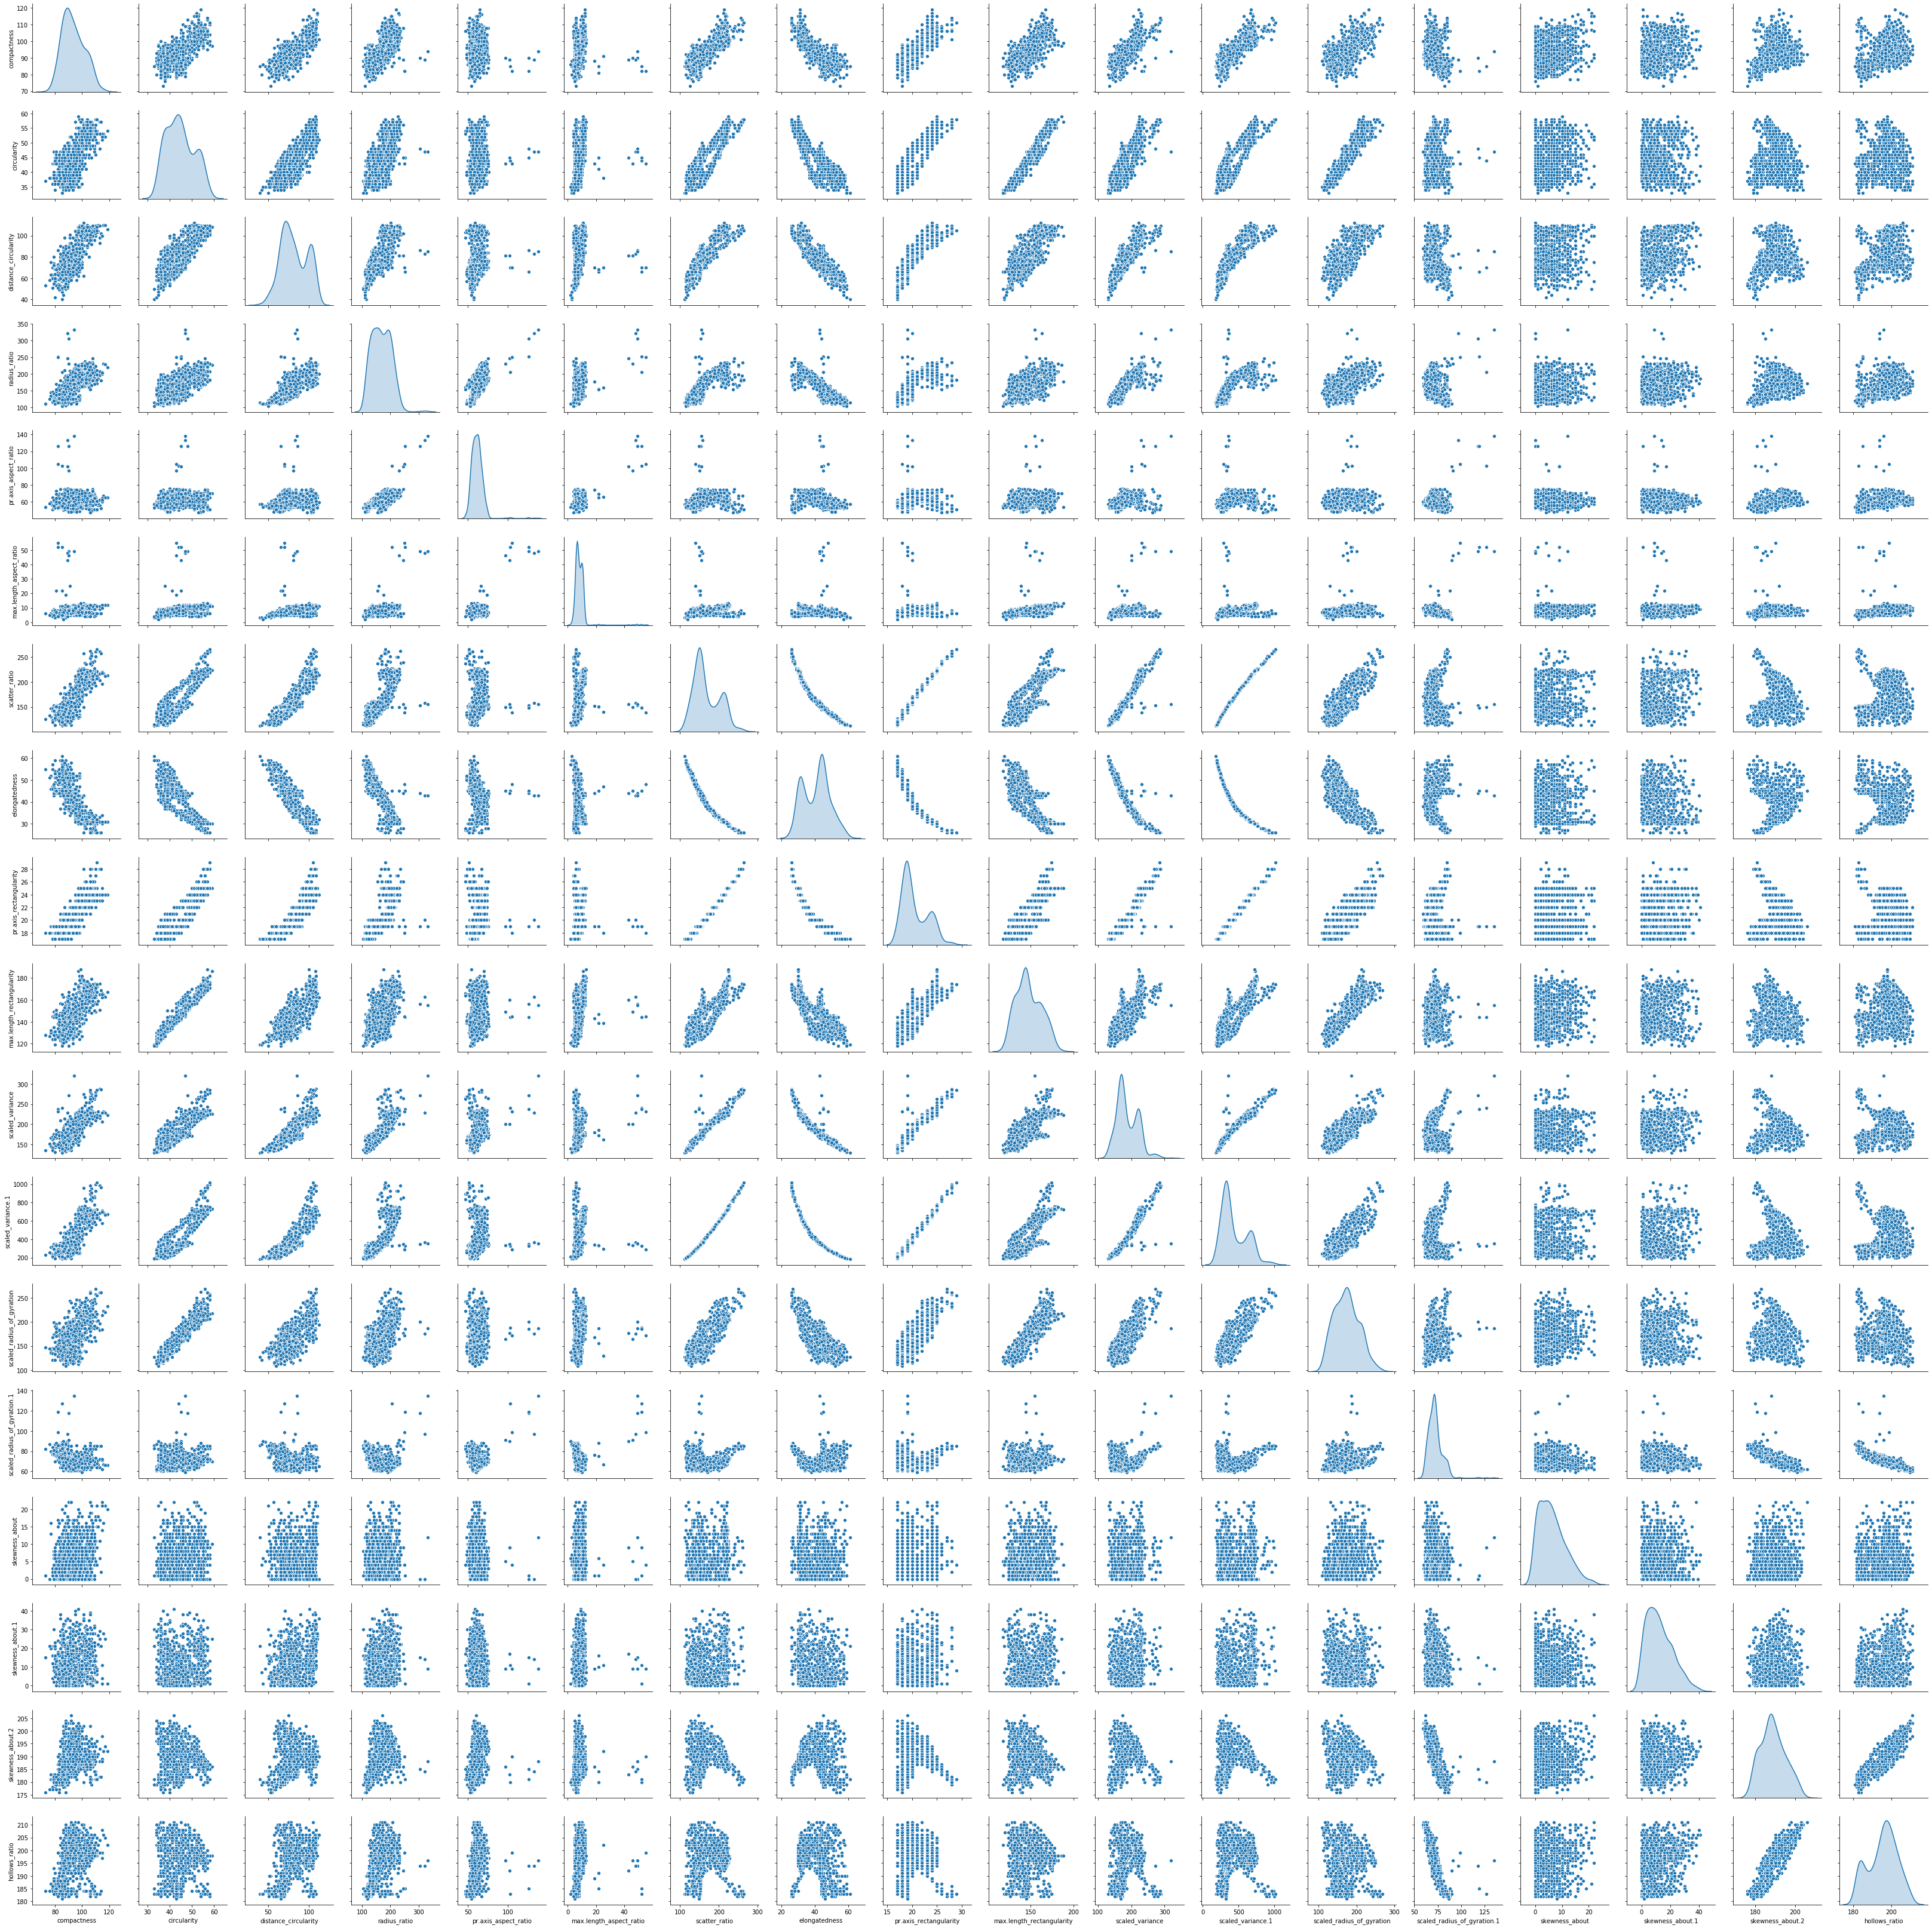

In [11]:
# independant variables
X = df.drop(['class'], axis=1)
# the dependent variable
y = df[['class']]
# PAIR PLOT OF ATTRIBUTES 
sns.pairplot(X, diag_kind='kde')   

### FROM ABOVE PAIR PLOT AND BELOW HEATMAP ONE CAN SEE
####  Scaled Variance & Scaled Variance.1 seems to be strongly correlated
####  skewness_about_2 and hollow_ratio seems to be strongly correlated
####  ditance_circularity and radius_ratio seems to have high positive correlation
####  compactness & circularity , radius_ratio & pr.axis_aspect_ratio also seems ver averagely correlated
####  scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly correlated
####  pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated
####  scatter_ratio and elongatedness seems to be have strong negative correlation
####  elongatedness and pr.axis_rectangularity seems to have strong negative correlation
####  max_length_aspect_ratio & radius_ratio have average correlation 
####  pr.axis_aspect_ratio & max_length_aspect_ratio seems to have very little correlation
####  scaled_radius_gyration & scaled_radisu_gyration.1 seems to be very little correlated
####  scaled_radius_gyration.1 & skewness_about seems to be very little correlated
####  skewness_about & skewness_about.1 not be correlated
####  skewness_about.1 and skewness_about.2 are not correlated.

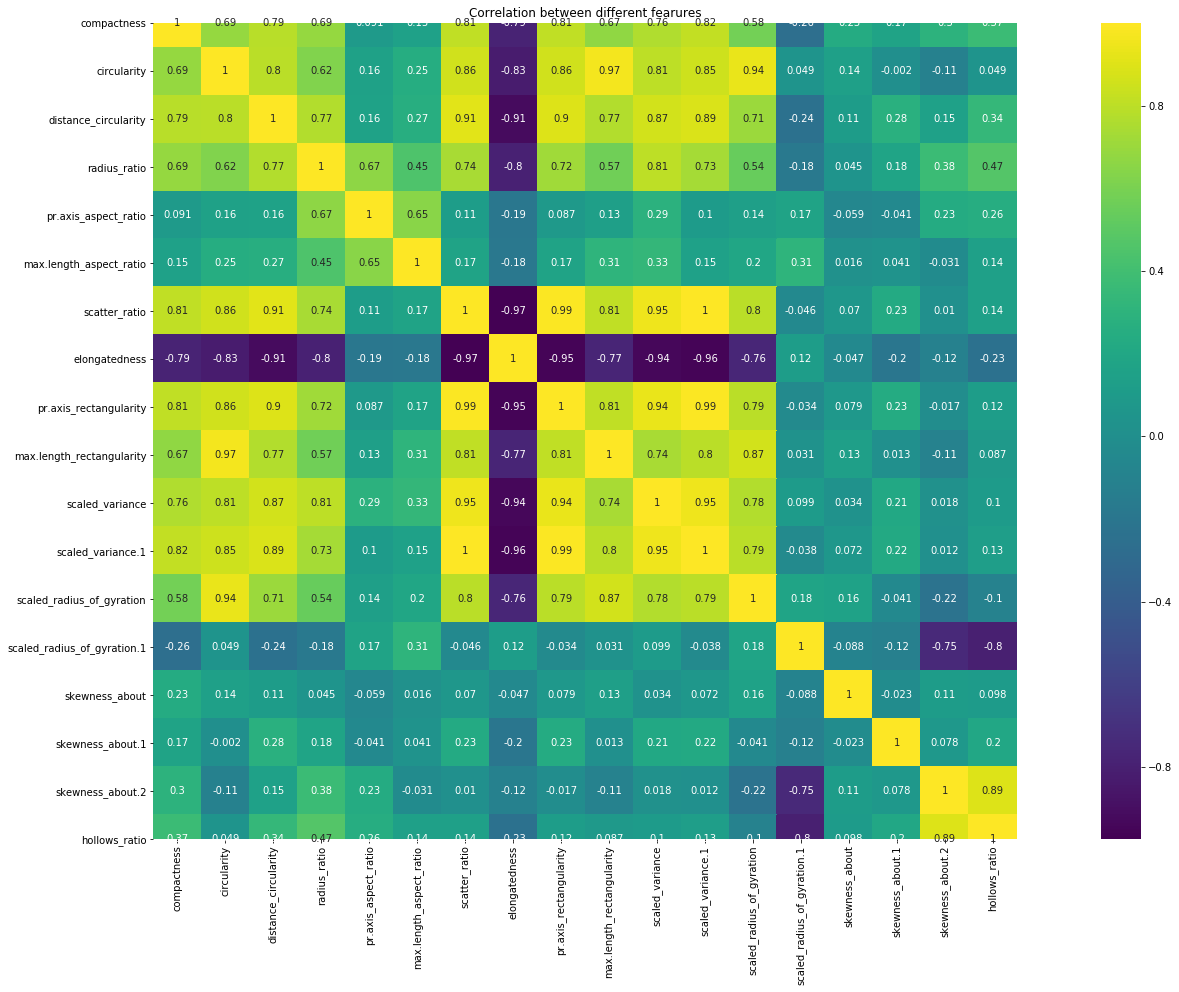

In [12]:
def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();
    

correlation_heatmap(X, 30,15)


In [13]:
X.corr() 

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689885              0.789955   
circularity                     0.689885     1.000000              0.797704   
distance_circularity            0.789955     0.797704              1.000000   
radius_ratio                    0.688130     0.623950              0.771404   
pr.axis_aspect_ratio            0.090557     0.155023              0.163386   
max.length_aspect_ratio         0.150369     0.251619              0.265591   
scatter_ratio                   0.814026     0.858149              0.909023   
elongatedness                  -0.788051    -0.825108             -0.912713   
pr.axis_rectangularity          0.814227     0.856137              0.897261   
max.length_rectangularity       0.674902     0.965366              0.773459   
scaled_variance                 0.764386     0.806108              0.865683   
scaled_variance.1               0.820240     0.850932              0.891789   
scaled_radius_of_gyration       0.581405     0.935594              0.705689   
scaled_radius_of_gyration.1    -0.258437     0.049070             -0.238145   
skewness_about                  0.231648     0.141726              0.110280   
skewness_about.1                0.168384    -0.001975              0.277851   
skewness_about.2                0.296195    -0.113902              0.145258   
hollows_ratio                   0.372806     0.049331              0.343228   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.688130              0.090557   
circularity                      0.623950              0.155023   
distance_circularity             0.771404              0.163386   
radius_ratio                     1.000000              0.667375   
pr.axis_aspect_ratio             0.667375              1.000000   
max.length_aspect_ratio          0.452460              0.652093   
scatter_ratio                    0.743470              0.113696   
elongatedness                   -0.795761             -0.191193   
pr.axis_rectangularity           0.716210              0.086992   
max.length_rectangularity        0.570478              0.133553   
scaled_variance                  0.806788              0.290375   
scaled_variance.1                0.731773              0.100668   
scaled_radius_of_gyration        0.544636              0.135663   
scaled_radius_of_gyration.1     -0.175348              0.173060   
skewness_about                   0.044693             -0.059244   
skewness_about.1                 0.178079             -0.040769   
skewness_about.2                 0.375591              0.229702   
hollows_ratio                    0.470895              0.257566   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.150369       0.814026   
circularity                                 0.251619       0.858149   
distance_circularity                        0.265591       0.909023   
radius_ratio                                0.452460       0.743470   
pr.axis_aspect_ratio                        0.652093       0.113696   
max.length_aspect_ratio                     1.000000       0.171445   
scatter_ratio                               0.171445       1.000000   
elongatedness                              -0.183242      -0.973413   
pr.axis_rectangularity                      0.167514       0.991992   
max.length_rectangularity                   0.309180       0.808154   
scaled_variance                             0.331124       0.950067   
scaled_variance.1                           0.150069       0.996396   
scaled_radius_of_gyration                   0.197179       0.795748   
scaled_radius_of_gyration.1                 0.308329      -0.045632   
skewness_about                              0.016461       0.070118   
skewness_about.1                            0.041210       0.227375   
skewness_about.2                           -0.

In [14]:
X.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   813.000000   813.000000             813.00000    813.000000   
mean     93.656827    44.803198              82.04305    169.098401   
std       8.233751     6.146659              15.78307     33.615402   
min      73.000000    33.000000              40.00000    104.000000   
25%      87.000000    40.000000              70.00000    141.000000   
50%      93.000000    44.000000              79.00000    167.000000   
75%     100.000000    49.000000              98.00000    195.000000   
max     119.000000    59.000000             112.00000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            813.000000               813.000000     813.000000   
mean              61.774908                 8.599016     168.563346   
std                7.973000                 4.677174      33.082186   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     146.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count      813.00000              813.000000                 813.000000   
mean        40.98893               20.558426                 147.891759   
std          7.80338                2.573184                  14.504648   
min         26.00000               17.000000                 118.000000   
25%         33.00000               19.000000                 137.000000   
50%         43.00000               20.000000                 146.000000   
75%         46.00000               23.000000                 159.000000   
max         61.00000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       813.000000         813.000000                 813.000000   
mean        188.377614         438.382534                 174.252153   
std          31.165873         175.270368                  32.332161   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         364.000000                 173.000000   
75%         217.000000         586.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   813.000000      813.000000        813.000000   
mean                     72.399754        6.351784         12.687577   
std                       7.475994        4.921476          8.926951   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          6.000000   
50%                      71.000000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        813.000000     813.000000  
mean         188.979090     195.729397  
std            6.153681       7.398781  
min          176.000000     181.000000  
25%          184.000000     191.000000  
50%          189.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

# 3. SPLIT DATA

In [15]:
#SEPERATING DEPENDENT AND INDEPENDENT VARIABLES
cf = df.iloc[:,0:18].values
ef = df.iloc[:,18].values

In [16]:
#SCALING THE DATA
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_std =  sc.fit_transform(cf)

In [17]:
#orginal Data TRAIN TEST SPLIT
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(X_std,y,test_size=0.30,random_state=1)

# 4. SUPPORT VECTOR MACHINES BEFORE PCA

In [18]:
from sklearn.svm import SVC
svc = SVC()
#fit the model on orighinal raw data
svc.fit(Orig_X_train,Orig_y_train)
#predict the y value
Orig_y_predict = svc.predict(Orig_X_test)

print("Model Score On Original Data ",svc.score(Orig_X_test, Orig_y_test))

Model Score On Original Data  0.9549180327868853


C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Accuracy score of SVM model for original data is 95.49%

# 5. K FOLDS CROSS VALIDATION BEFORE PCA

In [19]:
# IMPORTING KFOLD AND CROSS VALIDATION SCORE FROM SKLEARN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [20]:
#HOW DATA IS SPLIT WITH NUMBER OF SPLITS 5
kf = KFold(n_splits=5, shuffle=False).split(range(813))
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378
 379 380 381 382 

In [23]:
#svc_scores = cross_val_score(svc, X_std, y, cv=kf, scoring='accuracy')
# 5 FOLD CROSS VALIDATION SVM
svc_scores = cross_val_score(svc, X_std, y, cv=5, scoring='accuracy')
# 10 FOLD CROSS VALIDATION SVM
svc2_scores = cross_val_score(svc, X_std, y, cv=10, scoring='accuracy')
print(svc_scores)
print(svc2_scores)

C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

[0.95092025 0.96932515 0.98159509 0.95061728 0.96296296]
[0.93975904 0.96385542 0.97590361 0.96341463 1.         0.9625
 0.975      0.9625     0.975      0.9625    ]


C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConve

In [24]:
print(svc_scores.mean())
print(svc2_scores.mean())

0.9630841475422253
0.9680432706435498


#### THE CROSS VALIDATION SCORES
#### FOR 5 FOLD IS 96.3
#### FOR 10 FOLD IS 96.8
#### WHICH ARE HIGHER WHEN COMPARED TO STANDARD SVM MODEL

# 6. PCA

In [23]:
# IMPORT PCA FROM SKLEARN
from sklearn.decomposition import PCA

In [24]:
#FORMING THE COVARIANCE MATRIX
cov_matrix = np.cov(X_std.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
   0.81502868 -0.78902127  0.81522961  0.67573322  0.76532752  0.82125027
   0.58212123 -0.25875528  0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
   0.85920548 -0.8261242   0.85719089  0.96655501  0.80710097  0.85197956
   0.93674669  0.0491303   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
   0.91014241 -0.9138366   0.89836576  0.77441118  0.86674929  0.89288735
   0.70655787 -0.23843852  0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
   0.74438595 -0.79674104  0.71709175  0.57118076  0.80778118  0.73267385
   0.54530637 -0.17556405  0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0

In [25]:
# PRINTING OUT EIGEN VALUES AND EIGEN VECTORS
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.74447428e-01  1.27105989e-01 -1.15778231e-01 -8.00766389e-02
   7.01971756e-02  1.41269187e-01  4.78882430e-01 -5.51289488e-01
   4.70291162e-01  2.71011706e-01 -3.88480982e-02  3.37118452e-02
   1.68590056e-01 -4.08522941e-02  3.33699383e-02  4.49941671e-02
  -8.72862091e-03  4.27500161e-04]
 [ 2.94003600e-01 -1.34430321e-01 -3.64513515e-02 -1.90342131e-01
  -8.66726774e-02 -2.78132128e-01 -2.32112671e-01 -1.77146565e-01
   8.14934003e-03 -8.72464933e-02  1.10855608e-02 -1.12606467e-01
  -6.30087058e-02  1.60416148e-01 -4.20446984e-01  6.57048309e-01
  -1.69794331e-01  1.73650656e-02]
 [ 3.04380218e-01  7.21448351e-02 -5.51881577e-02  6.93709791e-02
   3.89590342e-02 -1.36322721e-01  6.01737282e-02  4.36495932e-01
   1.76997855e-01  2.14799970e-01 -7.02546566e-01 -2.85482662e-02
  -2.16299609e-01 -2.13651022e-01 -1.19627607e-01 -2.21685599e-02
   2.86460253e-02 -1.13772044e-02]
 [ 2.68888600e-01  1.76416250e-01  2.81804540e-01  4.46505645e-02
  -4.36633252e-02  

In [26]:

eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked,print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.453386999070815, array([ 0.27444743,  0.2940036 ,  0.30438022,  0.2688886 ,  0.08301999,
        0.09848255,  0.31668895, -0.31320505,  0.31361223,  0.28128567,
        0.30916156,  0.31416351,  0.27033732, -0.02560369,  0.03967995,
        0.06316001,  0.03094103,  0.07936613])), (2.9896188751110637, array([ 0.12710599, -0.13443032,  0.07214484,  0.17641625,  0.09876335,
       -0.03020685, -0.04438994, -0.01525397, -0.0572306 , -0.12032438,
       -0.06190968, -0.0480211 , -0.2101697 , -0.4937938 ,  0.05626019,
        0.12103543,  0.5444917 ,  0.53888165])), (1.9176872101272049, array([-0.11577823, -0.03645135, -0.05518816,  0.28180454,  0.64576888,
        0.58641235, -0.09858482,  0.05665152, -0.11203925, -0.02413247,
        0.05972347, -0.10945278, -0.0370631 ,  0.27577954, -0.11019178,
       -0.08049935,  0.031728  ,  0.05694625])), (1.1701169611149158, array([-0.08007664, -0.19034213,  0.06937098,  0.04465056, -0.03005322,
       -0.0297503 ,  0.09441724, -0.08506744,  0.

In [27]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained 
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance.

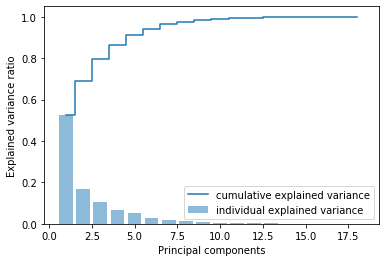

In [28]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

#### From above we plot we can observe that   "" 8 dimensions are able to explain 95 %variance of data"". 
#### so we will use first 8 principal components going forward and calulate the reduced dimensions. 

In [29]:
P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 8 to 4 dimension space

X_std_8D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

reduced_pca = pd.DataFrame(X_std_8D)  # converting array to dataframe for pairplot

reduced_pca

0         1          2         3         4         5         6  \
0    0.352249  0.141027   0.961832 -0.190872  0.069616 -0.740301 -0.882080   
1   -1.578072  0.422197  -0.365261 -0.239334  0.685899 -0.530580  0.345639   
2    3.782556 -0.253257   0.061756 -1.216416  0.717337  0.728388 -0.015941   
3   -1.713214  2.819496   0.186835 -0.379588 -0.357389 -0.514101  0.450872   
4    0.532165 -5.153595  11.400516 -0.066717  3.242363 -0.360525  2.569695   
..        ...       ...        ...       ...       ...       ...       ...   
808 -0.420214  0.579732   0.197542  1.445859  1.069931  0.804298 -0.032025   
809 -0.295035 -0.223473   0.739082  0.891889 -0.246193 -1.435235 -0.625594   
810  4.831130 -0.073236   0.489974 -0.317896 -1.359239 -0.195120  0.599520   
811 -3.269416  1.018665  -0.343441  1.927256  0.047640 -0.423563 -0.241143   
812 -4.755217 -0.307670  -0.582164  1.226277 -0.052286 -0.348528  0.055336   

            7  
0   -0.388323  
1    0.258324  
2    0.478896  
3   -0.011059  
4   -0.400351  
..        ...  
808  0.508775  
809 -0.158588  
810  0.127670  
811  0.314877  
812 -0.236865  

[813 rows x 8 columns]

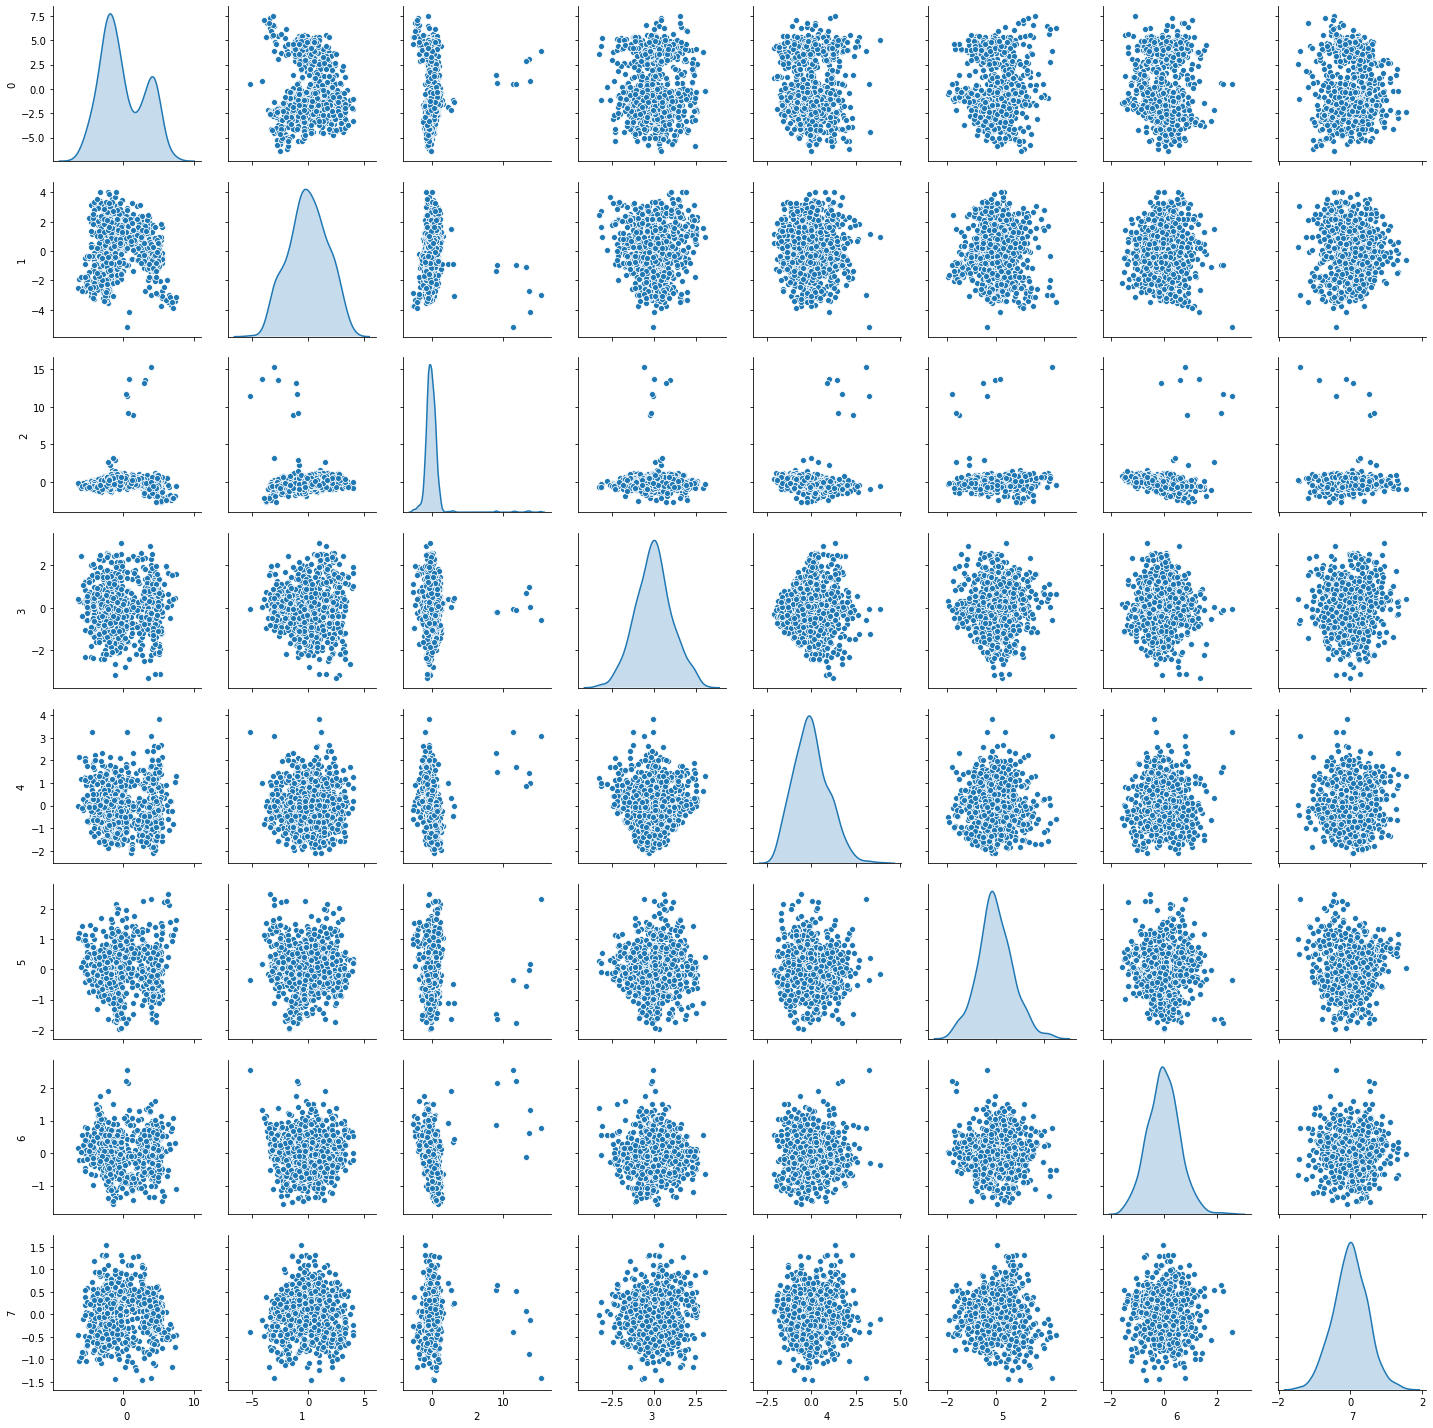

In [30]:
# PAIR PLOT OF DIMENTIONALLY REDUCED DATA
sns.pairplot(reduced_pca, diag_kind='kde') 

#### FROM ABOVE PAIR PLOT
#### After dimensionality reduction using PCA our attributes have become independent with no correlation among themselves

# 7. AFTER PCA MODELS

In [31]:
#PCA Data split
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(reduced_pca,y,test_size=0.30,random_state=1)

### SUPPORT VECTOR MACHINES AFTER PCA

In [32]:
# SVM MODEL AFTER DIMENTIONALITY REDUCTION
svc1 = SVC()
svc1.fit(pca_X_train,pca_y_train)

pca_y_predict = svc1.predict(pca_X_test)
print("Model Score On Reduced PCA Dimension ",svc1.score(pca_X_test, pca_y_test))

Model Score On Reduced PCA Dimension  0.9344262295081968


C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### Accuracy score of SVM model after dimentionality reduction is 93.44%.
#### Therefore we have sacrificed only 2.05% with 8 dimensions of data

### KFOLDS CLASSIFICATION AFTER PCA

In [33]:
svc1_scores = cross_val_score(svc1, X_std, y, cv=5, scoring='accuracy')
svc3_scores = cross_val_score(svc1, X_std, y, cv=10, scoring='accuracy')
print(svc1_scores)
print(svc3_scores)

C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

[0.95092025 0.96932515 0.98159509 0.95061728 0.96296296]
[0.93975904 0.96385542 0.97590361 0.96341463 1.         0.9625
 0.975      0.9625     0.975      0.9625    ]


C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lokesh duvvuru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

In [34]:
print(svc1_scores.mean())
print(svc3_scores.mean())

0.9630841475422253
0.9680432706435498


#### The cross validation scores after dimentionality reduction using PCA are 96.3 and 96.8 respectively for 5folds and 10folds. Which is same as before dimentionality reduction

# 8. COMPARISION OF SVM BEFORE AND AFTER PCA - FINDINGS

### ACCURACY SCORES OF SUPPORT VECTOR MACHINES BEFORE AND AFTER PCA DIMENSIONALITY
### REDUCTION ARE 95.49% AND 93.44% RESPECTIVELY
#### SO WITH 95% OF DATA ONE CAN SEE THAT ONLY 2.05%  ACCURACY SCORE LOST, WHICH IS VERY GOOD SINCE THE
#### COMPUTATION TIME CAN BE DECREASED ALMOST BY HALF SINCE WE ARE ONLY TAKING 8 DIMENSIONS INSTEAD OF 
#### 18 DIMENSIONS(ORIGINAL DATA)

### THE CROSS VALIDATION SCORE BEFORE AND AFTER PCA SEEMS TO REMAIN SAME 
### WHICH IS 96.3 AND 96.8 FOR 5FOLDS AND 10 FOLDS RESPECTIVELY
#### I HAVE USED SUPPORT VECTOR MACHINES MODEL FOR K FOLD CROSS VALIDATION
#### I ALSO TRIED KFOLD CROSS VALIDATION FOR LINEAR REGRESSION (CROSS-VAL SCORE approx 93% and 93.5% respectively for 5fold and 10fold)  AND GAUSIAN NAIVE BAYES ( CROSS-VALSCORE approx 60% and 61.2% respectively for 5fold and 10fold).
#### THEIR SCORES ALSO REMAINED UNCHANGED BEFORE AND AFTER PCA DIMENSIONALITY REDUCTION
#### AND ALSO SINCE OBJECTIVE IS TO COMPARE SUPPORT VECTOR MACHINE MODELS SCORE I REMOVED IT FROM ABOVE ASSIGNMENT

### NOW COMPARING ACCURACY SCORES OF SVM WITH CROSS VALIDATION SCORES OF SVM, BEFORE AND AFTER PCA DIMENTIONALITY REDUCTION THE CROSS VALIDATION SCORE OF KFOLD MODEL SEEMS TO BE HIGHER, SO IN MY OPINION KFOLDS OF SVM IS THE BEST MODEL